In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = "F:\\ME_2ndsem\\IV_project\\IV_implementation\\train"
validation_dir = "F:\\ME_2ndsem\\IV_project\\IV_implementation\\test"
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Model
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [3]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [5]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [6]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=80,  # 2000 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20,  # 1000 images = batch_size * steps
      verbose=1)

C:\Users\ADMIN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
80/80 [==============================] - 24s 296ms/step - loss: 0.5822 - acc: 0.7900 - val_loss: 0.4076 - val_acc: 0.8300
Epoch 2/30
80/80 [==============================] - 23s 292ms/step - loss: 0.3524 - acc: 0.8706 - val_loss: 0.3436 - val_acc: 0.8900
Epoch 3/30
80/80 [==============================] - 23s 288ms/step - loss: 0.2898 - acc: 0.8944 - val_loss: 0.3028 - val_acc: 0.8925
Epoch 4/30
80/80 [==============================] - 24s 299ms/step - loss: 0.2036 - acc: 0.9175 - val_loss: 0.4314 - val_acc: 0.8025
Epoch 5/30
80/80 [==============================] - 24s 295ms/step - loss: 0.1462 - acc: 0.9431 - val_loss: 0.2845 - val_acc: 0.9375
Epoch 6/30
80/80 [==============================] - 24s 304ms/step - loss: 0.1087 - acc: 0.9638 - val_loss: 0.2196 - val_acc: 0.9125
Epoch 7/30
80/80 [==============================] - 23s 289ms/step - loss: 0.0802 - acc: 0.9750 - val_loss: 0.4197 - val_acc: 0.9475
Epoch 8/30
80/80 [==============================] - 23s 289ms/step - 

<ipython-input-7-1a9aeb0db493>:37: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


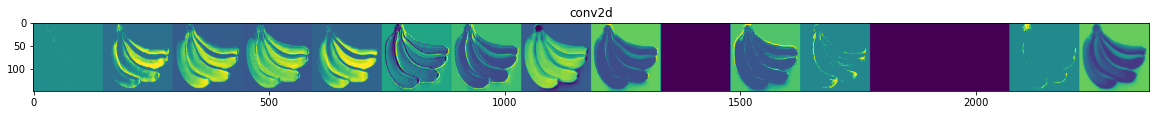

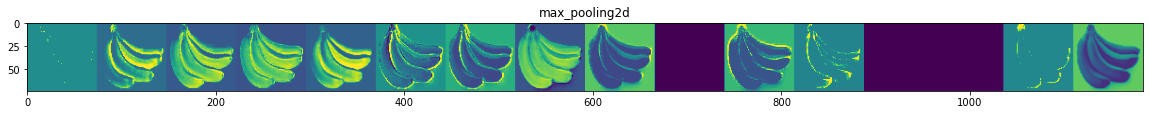

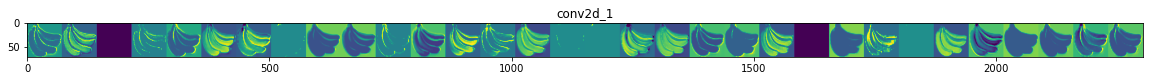

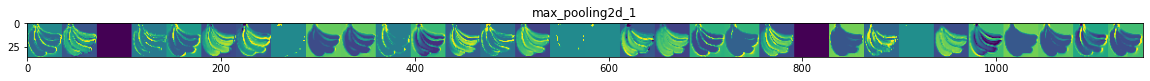

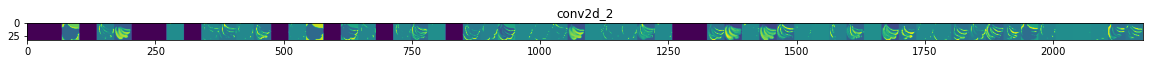

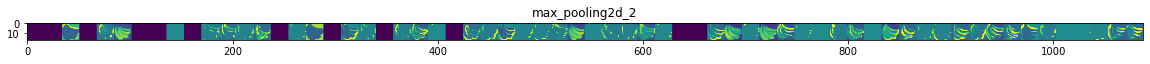

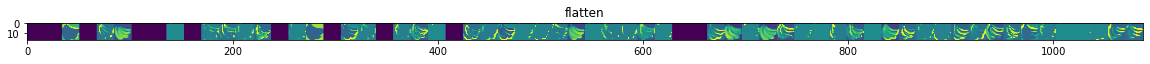

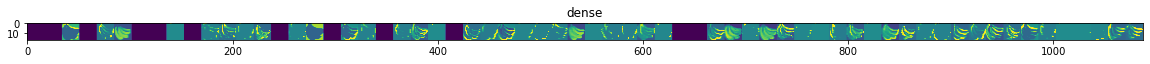

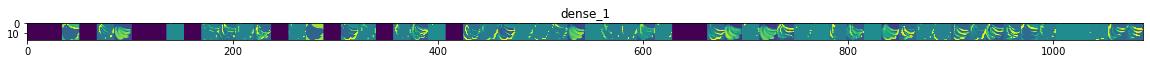

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

from tensorflow.keras.preprocessing.image import img_to_array, load_img
img_path = "F:\\ME_2ndsem\\IV_project\\IV_implementation\\test\\class2\\3.jpg"
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)
# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
    # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
          # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
          # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

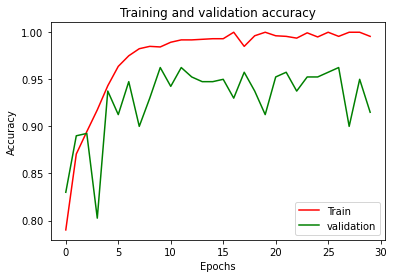

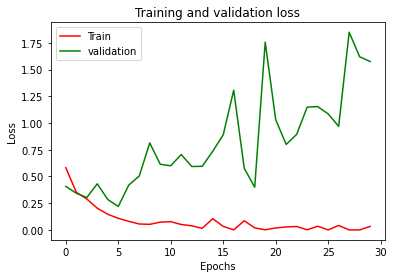

In [8]:
import matplotlib.pyplot as plt
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, color='r', label = 'Train')
plt.plot(epochs, val_acc, color='g', label = 'validation')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs'),plt.ylabel('Accuracy')
plt.legend()
plt.figure()


# Plot training and validation loss per epoch
plt.plot(epochs, loss, color='r', label = 'Train')
plt.plot(epochs, val_loss, color='g', label = 'validation')
plt.title('Training and validation loss')
plt.xlabel('Epochs'),plt.ylabel('Loss')
plt.legend()

In [11]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
img_path = "F:\\ME_2ndsem\\IV_project\\IV_implementation\\test\\class2\\2.jpg"
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255

y = model.predict(x)

In [12]:
import numpy as np
print("The loaded image belonged to the class",y)

The loaded image belonged to the class [[1.]]
